# Clustering drills

Welcome, traveller, you have arrived in the drills section of the clustering chapter. Here, you can practice some clustering techniques.

If you have not checked out the [example](./1.clustering_with_sklearn.ipynb), I advise you do so. We will use the same [pokemon](./assets/pokemon.csv) dataset to further our journey.

## 1. Multi-dimensional data

in the example, we wanted to determine the **most physically diverse** [pokemon](./assets/pokemon.csv) team there is. To do so, we clustered the pokemon into groups according to their **weight** and **height** using **k-means**.

Is this really the most diverse team out there though? The pokemon selected there are still similar in terms of **combat abilities**, and we have this data available.

For the first drill, I want you to:
   - cluster the pokemon into 6 groups according to similar:
       - height
       - weight
       - hp
       - attack
       - defense
       - speed
   - visualise these multidimensional clusters using a scatter plot matrix
   - determine the most dissimilar pokemon team from these clusters
   
So that you have **6-dimensional** clusters containing **diverse** pokemon groups from which you can determine your pokemon team similar to the method described in the example.

# Basics

### 0.0 Importing Packages

In [1]:
# Importing Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from fancyimpute import KNN,knn
from sklearn.preprocessing import StandardScaler

In [3]:
import seaborn as sns

### 0.1 Reading File

In [4]:
df = pd.read_csv('pokemon.csv')

### 0.2 Warming up

In [5]:
df.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')

In [6]:
df.isnull().sum()

abilities              0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           0
classfication          0
defense                0
experience_growth      0
height_m              20
hp                     0
japanese_name          0
name                   0
percentage_male       98
pokedex_number         0
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                384
weight_kg             20
generation             0


In [7]:
pokemon_metric = df.loc[:,['height_m',
'weight_kg',
'hp',
'attack',
'defense',
'speed']]

In [8]:
pokemon_metric.isnull().sum()

height_m     20
weight_kg    20
hp            0
attack        0
defense       0
speed         0
dtype: int64

In [9]:
pokemon_metric[['weight_kg','height_m']]

,weight_kg,height_m
0,6.9,0.7
1,13.0,1.0
2,100.0,2.0
3,8.5,0.6
4,19.0,1.1
...,...,...
796,999.9,9.2
797,0.1,0.3
798,888.0,5.5
799,230.0,2.4


In [10]:
pokemon_metric[pokemon_metric['height_m'].isnull() | pokemon_metric['weight_kg'].isnull()].head(10)


,height_m,weight_kg,hp,attack,defense,speed
18,NaN,NaN,30,56,35,72
19,NaN,NaN,75,71,70,77
25,NaN,NaN,60,85,50,110
26,NaN,NaN,50,75,90,40
27,NaN,NaN,75,100,120,65
36,NaN,NaN,38,41,40,65
37,NaN,NaN,73,67,75,109
49,NaN,NaN,10,55,30,90
50,NaN,NaN,35,100,60,110
51,NaN,NaN,40,35,35,90


# 1.0 Preprocessing Steps 

In [11]:
pokemon_metric[pokemon_metric['height_m'].isnull() | pokemon_metric['weight_kg'].isnull()] = KNN(k=10, verbose=0).fit_transform(pokemon_metric[pokemon_metric['height_m'].isnull() | pokemon_metric['weight_kg'].isnull()])

In [12]:
pokemon_metric.isnull().sum()

height_m     0
weight_kg    0
hp           0
attack       0
defense      0
speed        0
dtype: int64

In [13]:
pokemon_std=(pokemon_metric-pokemon_metric.mean())/pokemon_metric.std()

# 2.0 Clustering

In [14]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6, init='k-means++').fit(pokemon_std)

In [15]:
cluster_centers = kmeans.cluster_centers_
cluster_label = pd.Series(kmeans.labels_, name = 'cluster')

In [16]:
pokemon_std = pokemon_std.join(cluster_label.to_frame())

In [17]:
pokemon_metric

,height_m,weight_kg,hp,attack,defense,speed
0,0.7,6.9,45.0,49.0,49.0,45.0
1,1.0,13.0,60.0,62.0,63.0,60.0
2,2.0,100.0,80.0,100.0,123.0,80.0
3,0.6,8.5,39.0,52.0,43.0,65.0
4,1.1,19.0,58.0,64.0,58.0,80.0
...,...,...,...,...,...,...
796,9.2,999.9,97.0,101.0,103.0,61.0
797,0.3,0.1,59.0,181.0,131.0,109.0
798,5.5,888.0,223.0,101.0,53.0,43.0
799,2.4,230.0,97.0,107.0,101.0,79.0


In [18]:
pokemon_std

,height_m,weight_kg,hp,attack,defense,speed,cluster
0,-0.401839,-0.488412,-0.901520,-0.897349,-0.780286,-0.738025,5
1,-0.124601,-0.432140,-0.337101,-0.493105,-0.325285,-0.219132,5
2,0.799525,0.370416,0.415457,0.688530,1.624720,0.472727,1
3,-0.494252,-0.473652,-1.127287,-0.804062,-0.975286,-0.046167,5
4,-0.032189,-0.376792,-0.412357,-0.430914,-0.487785,0.472727,5
...,...,...,...,...,...,...,...
796,7.453233,8.671803,1.055132,0.719626,0.974718,-0.184539,4
797,-0.771490,-0.551140,-0.374729,3.207279,1.884720,1.475921,0
798,4.033966,7.639550,5.796249,0.719626,-0.650286,-0.807211,4
799,1.169175,1.569639,1.055132,0.906200,0.909718,0.438134,2


# 3.0 Plotting

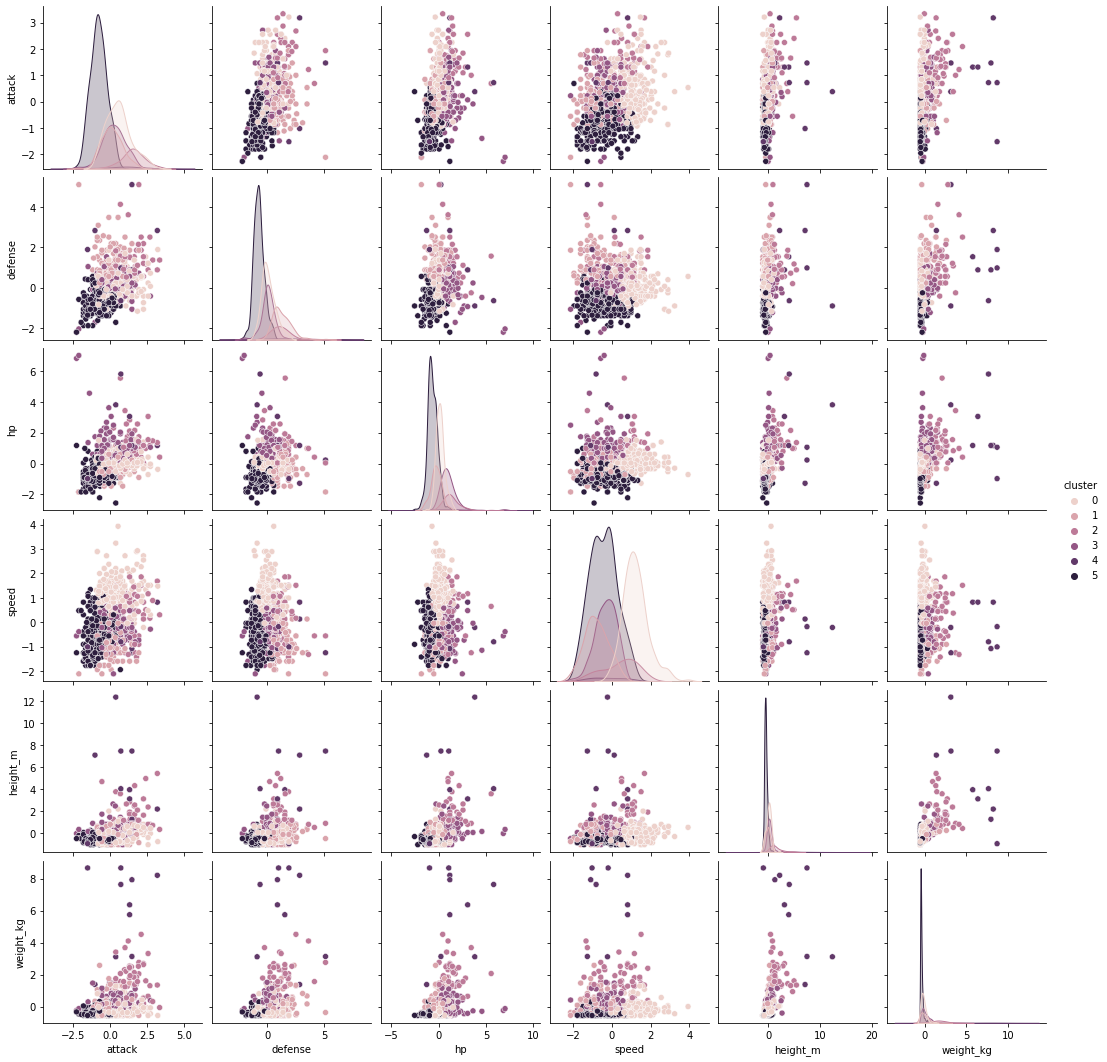

In [19]:
sns.pairplot(data=pokemon_std, vars=['attack','defense', 'hp', 'speed', 'height_m','weight_kg'], hue='cluster')

# 4.0 Identifying My Poki

In [20]:

# determine your final pokemon here
def distance_to_other_clusters(single_pokemon):
    metric = np.array(single_pokemon[['weight_kg','height_m','attack','defense','speed','hp']])
    cluster_number = round(single_pokemon['cluster'])
    distance = 0
    for cluster_index in range(0, len(cluster_centers)):
        if cluster_index == cluster_number:
            continue
        center = cluster_centers[cluster_index]
        distance += np.sqrt(sum(np.square(metric - center))) # Euclidean Distance
    return distance

# evaluate all pokemon
pokemon_dissimilarity = pokemon_std.apply(distance_to_other_clusters, axis=1)
pokemon_dissimilarity = pokemon_dissimilarity.rename('dissimilarity')

# join to other metrics
pokemon_processed = pokemon_std.join(pokemon_dissimilarity.to_frame()).join(df['name'].to_frame())

# pick most dissimilar pokemon per cluster
chosen_pokemon = pd.DataFrame()
for cluster_index in range(0, len(cluster_centers)):
    pokemon_cluster = pokemon_processed[pokemon_processed['cluster'] == cluster_index]
    chosen_pokemon = chosen_pokemon.append(pokemon_cluster[pokemon_cluster['dissimilarity']==pokemon_cluster['dissimilarity'].max()])

In [21]:
chosen_pokemon

,height_m,weight_kg,hp,attack,defense,speed,cluster,dissimilarity,name
797,-0.771490,-0.551140,-0.374729,3.207279,1.884720,1.475921,0,25.408075,Kartana
212,-0.494252,-0.362955,-1.842218,-2.110080,5.102228,-2.121741,1,37.020930,Shuckle
717,3.571903,2.073312,5.532854,0.688530,1.559720,0.645691,2,36.453831,Zygarde
112,-0.032189,-0.232885,6.812203,-2.265558,-2.210289,-0.565061,3,43.326997,Chansey
320,12.351101,3.119403,3.801970,0.377574,-0.910286,-0.219132,4,65.913147,Wailord
439,-0.494252,-0.326978,1.168016,-2.265558,-2.210289,-1.256919,5,29.646291,Happiny


## 2. Similarity criteria

Very nice! What a unique team!

You probably used the same **similarity criteria** as the introduction example. **k-means** uses Euclidean distance as a similarity criteria, so it makes sense that we also use Euclidean distance for our **dissimilarity criteria**, but what would happen if we picked something else?

"Woah, you're going too fast, 'Euclidean distance'? What do you mean by that?"

This is distance as we know it in the **real world**, a line connecting two points. But distance does not have to be defined this way in our **problem space**, it can be **Manhattan distance**, or **squared distance**, or something else entirely.

<img src="https://media.springernature.com/original/springer-static/image/chp%3A10.1007%2F978-981-10-8818-6_7/MediaObjects/463464_1_En_7_Fig2_HTML.jpg" align="center" width="600"/>

Replacing this similarity criteria for the `sklearn` k-means is no trivial task, so I will not ask this of you, but changing it for our **dissimilarity criteria** should be doable.

For the next exercise, I would like you to:
- replace the dissimilarity criteria from the example by:
    - manhattan distance
    - squared distance
    - 1/(squared distance)

# Manhattan Distance

### The Euclidean distance function measures the ‘as-the-crow-flies’ distance

In [22]:
# Assign dissimilarity to your pokemon here
from scipy.spatial.distance import cdist
def distance_to_other_clusters(single_pokemon):
    metric = np.array(single_pokemon[['weight_kg','height_m','attack','defense','speed','hp']])
    cluster_number = round(single_pokemon['cluster'])
    distance = 0
    for cluster_index in range(0, len(cluster_centers)):
        if cluster_index == cluster_number:
            continue
        center = cluster_centers[cluster_index]
        distance += (np.abs(sum(metric - center)))#Manhattan distance
        
    return distance

# evaluate all pokemon
pokemon_dissimilarity = pokemon_std.apply(distance_to_other_clusters, axis=1)
pokemon_dissimilarity = pokemon_dissimilarity.rename('dissimilarity')

# join to other metrics
pokemon_processed = pokemon_std.join(pokemon_dissimilarity.to_frame()).join(df['name'].to_frame())

# pick most dissimilar pokemon per cluster
chosen_pokemon2 = pd.DataFrame()
for cluster_index in range(0, len(cluster_centers)):
    pokemon_cluster = pokemon_processed[pokemon_processed['cluster'] == cluster_index]
    chosen_pokemon2 = chosen_pokemon2.append(pokemon_cluster[pokemon_cluster['dissimilarity']==pokemon_cluster['dissimilarity'].max()])

In [23]:
chosen_pokemon2

,height_m,weight_kg,hp,attack,defense,speed,cluster,dissimilarity,name
149,0.799525,0.573362,1.393783,2.243314,-0.097784,2.548301,0,32.054671,Mewtwo
596,-0.494252,-0.378637,-0.939148,-0.866253,0.584717,-1.948777,1,42.101392,Ferroseed
717,3.571903,2.073312,5.532854,0.688530,1.559720,0.645691,2,57.117245,Zygarde
38,-0.586664,-0.501326,1.732434,-1.021731,-1.722788,-1.602848,3,39.260430,Jigglypuff
796,7.453233,8.671803,1.055132,0.719626,0.974718,-0.184539,4,85.965711,Celesteela
190,-0.771490,-0.535458,-1.465938,-1.488166,-1.397787,-1.256919,5,60.207207,Sunkern


# Squared Distance

### The Euclidean Squared distance metric uses the same equation as the Euclidean distance metric, but does not take the square root. As a result, clustering with the Euclidean Squared distance metric is faster than clustering with the regular Euclidean distance. The output of Jarvis-Patrick and K-Means clustering is not affected if Euclidean distance is replaced with Euclidean squared. However, the output of hierarchical clustering is likely to change

In [24]:
def distance_to_other_clusters(single_pokemon):
    metric = np.array(single_pokemon[['weight_kg','height_m','attack','defense','speed','hp']])
    cluster_number = round(single_pokemon['cluster'])
    distance = 0
    for cluster_index in range(0, len(cluster_centers)):
        if cluster_index == cluster_number:
            continue
        center = cluster_centers[cluster_index]
        distance += sum(np.square(metric - center))
    return distance

# evaluate all pokemon
pokemon_dissimilarity = pokemon_std.apply(distance_to_other_clusters, axis=1)
pokemon_dissimilarity = pokemon_dissimilarity.rename('dissimilarity')

# join to other metrics
pokemon_processed = pokemon_std.join(pokemon_dissimilarity.to_frame()).join(df['name'].to_frame())

# pick most dissimilar pokemon per cluster
chosen_pokemon3 = pd.DataFrame()
for cluster_index in range(0, len(cluster_centers)):
    pokemon_cluster = pokemon_processed[pokemon_processed['cluster'] == cluster_index]
    chosen_pokemon3 = chosen_pokemon3.append(pokemon_cluster[pokemon_cluster['dissimilarity']==pokemon_cluster['dissimilarity'].max()])

In [25]:
chosen_pokemon3

,height_m,weight_kg,hp,attack,defense,speed,cluster,dissimilarity,name
797,-0.771490,-0.551140,-0.374729,3.207279,1.884720,1.475921,0,149.623572,Kartana
212,-0.494252,-0.362955,-1.842218,-2.110080,5.102228,-2.121741,1,289.278813,Shuckle
717,3.571903,2.073312,5.532854,0.688530,1.559720,0.645691,2,268.225068,Zygarde
112,-0.032189,-0.232885,6.812203,-2.265558,-2.210289,-0.565061,3,390.447867,Chansey
320,12.351101,3.119403,3.801970,0.377574,-0.910286,-0.219132,4,872.275468,Wailord
439,-0.494252,-0.326978,1.168016,-2.265558,-2.210289,-1.256919,5,201.676201,Happiny


# 1/(squared Distance)

### What is the Inverse Square Law Formula? The intensity of the light to an observer from a source is inversely proportional to the square of the distance from the observer to the source. This shows that as the distance from a light source increases, the intensity of light is equal to a value multiplied by 1/d2

In [26]:
def distance_to_other_clusters(single_pokemon):
    metric = np.array(single_pokemon[['weight_kg','height_m','attack','defense','speed','hp']])
    cluster_number = round(single_pokemon['cluster'])
    distance = 0
    for cluster_index in range(0, len(cluster_centers)):
        if cluster_index == cluster_number:
            continue
        center = cluster_centers[cluster_index]
        distance += 1/sum(np.square(metric - center))
    return distance

# evaluate all pokemon
pokemon_dissimilarity = pokemon_std.apply(distance_to_other_clusters, axis=1)
pokemon_dissimilarity = pokemon_dissimilarity.rename('dissimilarity')

# join to other metrics
pokemon_processed = pokemon_std.join(pokemon_dissimilarity.to_frame()).join(df['name'].to_frame())

# pick most dissimilar pokemon per cluster
chosen_pokemon4 = pd.DataFrame()
for cluster_index in range(0, len(cluster_centers)):
    pokemon_cluster = pokemon_processed[pokemon_processed['cluster'] == cluster_index]
    chosen_pokemon4 = chosen_pokemon4.append(pokemon_cluster[pokemon_cluster['dissimilarity']==pokemon_cluster['dissimilarity'].max()])

In [27]:
chosen_pokemon4

,height_m,weight_kg,hp,attack,defense,speed,cluster,dissimilarity,name
106,0.245049,-0.088978,-0.713380,0.844009,0.194716,0.334355,0,3.043383,Hitmonchan
341,-0.032189,-0.249490,-0.224217,1.310444,0.389717,-0.392096,1,2.528845,Crawdaunt
720,0.522287,1.246771,0.415457,0.999487,1.527220,0.126797,2,0.732236,Volcanion
30,0.152637,0.001425,0.791736,0.439765,0.454717,0.334355,3,2.784310,Nidoqueen
482,3.941554,5.748468,1.168016,1.310444,1.527220,0.818656,4,0.113234,Dialga
495,-0.309426,-0.404466,-0.337101,-0.555296,0.064716,0.576505,5,1.726808,Servine


Did your team change? Why do you think it did(n't)? Discuss this with one of your colleagues!

## 3. Heterogenous data

There! We did it! The most **diverse pokémon team** possible...or is it?

We have clustered our pokémon according to **weight** and **height** in the example, and according to **combat abilities** in the first drill, but what about **pokémon type**?

Some of the chosen pokémon may have the same type, as this data was ignored during clustering? But to get a really diverse team, we should take these into account!

For this drill I want you to:
- cluster the pokémon into 6 groups according to similar:
    - weight
    - height
    - primary pokémon type
    - secondary pokémon type
- determine the most dissimilar pokemon team from these clusters

But wait, these pokémon types, they're in **text format**, how do you compare these to the **numerical data**? It's time to **vectorize** this data. **Vectorizing** this textual data means representing this data in a way that can be understood by machine learning algorithms. 

For example, let's say there are only 3 pokémon types, and pokémon can only have one type. Vectorising a **grass**, **fire**, and **water** pokémon would look like this:
- grass -> [1, 0, 0]
- fire  -> [0, 1, 0]
- water -> [0, 0, 1]

So in this case, **3-dimensional** data. In our case though, we have a weight dimension, a height dimension, 18 primary and secondary dimensions, so a whopping **38 dimensions**

### 3.1 Taking only values, bcoz most of sklearn modules expect arrays

In [28]:
# vectorize your pokémon type data here (there are modules that vectorize data)
pokemon_metric2 = df.loc[:,['height_m',
'weight_kg','type1','type2']].values

In [29]:
pokemon_metric2

array([[0.7, 6.9, 'grass', 'poison'],
       [1.0, 13.0, 'grass', 'poison'],
       [2.0, 100.0, 'grass', 'poison'],
       ...,
       [5.5, 888.0, 'dark', 'dragon'],
       [2.4, 230.0, 'psychic', nan],
       [1.0, 80.5, 'steel', 'fairy']], dtype=object)

## 3.2 PreProcessing Steps

### 3.2.1 Dealing with Missing Values 

In [30]:
from sklearn.impute import SimpleImputer

In [31]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [32]:
imputer.fit(pokemon_metric2[:,:2])

SimpleImputer()

In [33]:
pokemon_metric2[:,:2] = imputer.transform(pokemon_metric2[:,:2])

In [34]:
pokemon_metric2

array([[0.7, 6.9, 'grass', 'poison'],
       [1.0, 13.0, 'grass', 'poison'],
       [2.0, 100.0, 'grass', 'poison'],
       ...,
       [5.5, 888.0, 'dark', 'dragon'],
       [2.4, 230.0, 'psychic', nan],
       [1.0, 80.5, 'steel', 'fairy']], dtype=object)

In [35]:
string_imputer = SimpleImputer(missing_values=np.nan, strategy="most_frequent")

In [36]:
string_imputer.fit(pokemon_metric2[:,2:])

SimpleImputer(strategy='most_frequent')

In [37]:
pokemon_metric2[:,2:] = string_imputer.transform(pokemon_metric2[:,2:])

In [38]:
pokemon_metric2

array([[0.7, 6.9, 'grass', 'poison'],
       [1.0, 13.0, 'grass', 'poison'],
       [2.0, 100.0, 'grass', 'poison'],
       ...,
       [5.5, 888.0, 'dark', 'dragon'],
       [2.4, 230.0, 'psychic', 'flying'],
       [1.0, 80.5, 'steel', 'fairy']], dtype=object)

## 3.2.2 Encoding Categorical Data

In [39]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [40]:
ct = ColumnTransformer(transformers=[('encoder',
                                     OneHotEncoder(),[2,3])],remainder='passthrough')

In [41]:
pokemon_metric2 = ct.fit_transform(pokemon_metric2)

In [42]:
pokemon_metric2=pokemon_metric2.toarray()

In [43]:
pokemon_metric2

array([[0.00e+00, 0.00e+00, 0.00e+00, ..., 0.00e+00, 7.00e-01, 6.90e+00],
       [0.00e+00, 0.00e+00, 0.00e+00, ..., 0.00e+00, 1.00e+00, 1.30e+01],
       [0.00e+00, 0.00e+00, 0.00e+00, ..., 0.00e+00, 2.00e+00, 1.00e+02],
       ...,
       [0.00e+00, 1.00e+00, 0.00e+00, ..., 0.00e+00, 5.50e+00, 8.88e+02],
       [0.00e+00, 0.00e+00, 0.00e+00, ..., 0.00e+00, 2.40e+00, 2.30e+02],
       [0.00e+00, 0.00e+00, 0.00e+00, ..., 0.00e+00, 1.00e+00, 8.05e+01]])

## 3.2.3 Feature Scaling

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
sc = StandardScaler()

In [46]:
pokemon_metric2[:,-2:]

array([[7.00e-01, 6.90e+00],
       [1.00e+00, 1.30e+01],
       [2.00e+00, 1.00e+02],
       ...,
       [5.50e+00, 8.88e+02],
       [2.40e+00, 2.30e+02],
       [1.00e+00, 8.05e+01]])

In [47]:
pokemon_metric2[:,-2:] = sc.fit_transform(pokemon_metric2[:,-2:])

## 3.3 clustering in KMeans

In [48]:
kmeans2 = KMeans(n_clusters=6, init='k-means++').fit(pokemon_metric2)

In [49]:
cluster_center2 = kmeans2.cluster_centers_

In [60]:
cluster_center2.shape

(6, 38)

In [50]:
cluster_labels2 = pd.Series(kmeans2.labels_,name='cluster')

## 3.3 OBT

In [51]:
pokemon_metric3 = df.loc[:,['height_m',
'weight_kg','type1','type2']]

In [52]:
pokemon_metric3

,height_m,weight_kg,type1,type2
0,0.7,6.9,grass,poison
1,1.0,13.0,grass,poison
2,2.0,100.0,grass,poison
3,0.6,8.5,fire,NaN
4,1.1,19.0,fire,NaN
...,...,...,...,...
796,9.2,999.9,steel,flying
797,0.3,0.1,grass,steel
798,5.5,888.0,dark,dragon
799,2.4,230.0,psychic,NaN


## 3.3.1 PP steps 

In [53]:
pokemon_metric3['weight_kg'] = pokemon_metric3['weight_kg'].replace(np.nan,pokemon_metric3['weight_kg'].mean())
pokemon_metric3['height_m'] = pokemon_metric3['height_m'].replace(np.nan,pokemon_metric3['height_m'].mean())
pokemon_metric3['type2'] = pokemon_metric3['type2'].fillna(pokemon_metric3['type2'].value_counts().keys()[0])

In [54]:
pokemon_metric3

,height_m,weight_kg,type1,type2
0,0.7,6.9,grass,poison
1,1.0,13.0,grass,poison
2,2.0,100.0,grass,poison
3,0.6,8.5,fire,flying
4,1.1,19.0,fire,flying
...,...,...,...,...
796,9.2,999.9,steel,flying
797,0.3,0.1,grass,steel
798,5.5,888.0,dark,dragon
799,2.4,230.0,psychic,flying


In [55]:
pokemon_metric3_std = (pokemon_metric3[['weight_kg','height_m']]-pokemon_metric3[['weight_kg','height_m']].mean())/pokemon_metric3[['weight_kg','height_m']].std()

In [56]:
 pokemon_metric3_std=pokemon_metric3_std.join(cluster_labels2.to_frame())

In [57]:
pokemon_metric3_std

,weight_kg,height_m,cluster
0,-0.504524,-0.434871,5
1,-0.448032,-0.153639,5
2,0.357679,0.783799,5
3,-0.489706,-0.528614,1
4,-0.392466,-0.059895,1
...,...,...,...
796,8.691693,7.533356,3
797,-0.567499,-0.809846,5
798,7.655382,4.064834,3
799,1.561615,1.158775,4


In [58]:
# determine your unique team here
def distance_to_other_clusters(single_pokemon):
    metric = np.array(single_pokemon[['height_m','weight_kg']])
    cluster_number = round(single_pokemon['cluster'])
    distance = 0
    for cluster_index in range(0, len(cluster_center2[:,-2:])):
        if cluster_index == cluster_number:
            continue
        center = cluster_center2[:,-2:][cluster_index]
        distance += (np.abs(sum(metric - center)))#Manhattan distance
        
    return distance

# evaluate all pokemon
pokemon_dissimilarity = pokemon_metric3_std.apply(distance_to_other_clusters, axis=1)
pokemon_dissimilarity = pokemon_dissimilarity.rename('dissimilarity')

# join to other metrics
pokemon_processed = pokemon_metric3_std.join(pokemon_dissimilarity.to_frame()).join(df['name'].to_frame())

# pick most dissimilar pokemon per cluster
chosen_pokemon2 = pd.DataFrame()
for cluster_index in range(0, len(cluster_center2)):
    pokemon_cluster = pokemon_processed[pokemon_processed['cluster'] == cluster_index]
    chosen_pokemon2 = chosen_pokemon2.append(pokemon_cluster[pokemon_cluster['dissimilarity']==pokemon_cluster['dissimilarity'].max()])

In [59]:
chosen_pokemon2

,weight_kg,height_m,cluster,dissimilarity,name
732,-0.327638,-0.059895,0,23.923016,Toucannon
668,-0.567499,-0.997334,1,30.068034,Flabébé
320,3.117470,12.501780,2,65.295916,Wailord
796,8.691693,7.533356,3,70.460107,Celesteela
381,2.691462,3.127395,4,25.863954,Kyogre
741,-0.566573,-0.997334,5,29.499468,Cutiefly


But wait, did you properly **normalize** your data? If you simply vectorize your data like in the example shown above, you might not get the results you want (try this for yourselves, what do you notice?).

The example normalizes its data using the **z-score**. What does this mean? z-score or mean normalization means we are using our **problem space** where our data lives optimally. 

in the case of the pokemon weight and height, it was clear to see the **order of magnitude** of the weight is larger than that of the height. During clustering, this would mean that **weight similarity would matter more than height similarity**, since the euclidian distance between points of data would be larger.

For example, A pokemon weighing 200kg and measuring 4m is about **as similar** as another pokémon weighing 100kg and measuring 2m in terms of both weight and height. But the euclidian difference in between the weight difference is 100(kg), while the difference of height is only 2(m). That is where normalization comes in handy. It scales these metrics so they can be compared fairly.

Which is why when we vectorize out **pokémon types** into vectors of length one, the **euclidian distance** between one pokémon type and the other is about 1.4 (thanks Pythagoras), which isn't that much compared to the weight and height difference.

Show me how you would **make sure** that **similarity or dissimilarity** of the **pokémon type** matters more than **weight or height**?

In [ ]:
# normalize and scale your data in such a way that pokémon type similarity matters more than the other metrics

## 4. Cluster method comparison

I hope you're getting a bit more comfortable with the **k-means** method, it sure is a popular one, but it's [not the only clustering technique](https://scikit-learn.org/stable/modules/clustering.html) out there!

For this excercise, I want you to:
- pick 3 clustering techniques from the `scikit-learn` library
- cluster the pokémon according weight and height
- try to adjust the cluster method arguments so 6 clusters are obtained after clustering
- evaluate in-cluster similarity and cluster-to-cluster similarity:
  - compare every pokémon in a cluster to every other pokémon within that same cluster (choose your own similarity criteria)
  - take the average of these in-cluster similarities
  - do this for every cluster
  - take the the average or centroid of ever cluster, and determine the similarity to every other cluster
  - compare these two metrics (in-cluster similarity and cluster-to-cluster similarity) for every chosen clustering technique
  - determine the 'best' technique by maximising in-cluster similarity and minimizing cluster-to-cluster similarity
- visualize the results

Bonus: track these metrics for every iteration of the algorithms and plot the progression from start to finish

## 4.1 DBSCAN 

In [61]:
x = df.loc[:, ['height_m','weight_kg']]

In [62]:
from sklearn.impute import SimpleImputer 

In [63]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [64]:
imputer.fit(x)

SimpleImputer()

In [65]:
x = imputer.transform(x)

In [66]:
from sklearn.cluster import DBSCAN

In [67]:
dbscan = DBSCAN(eps=3,min_samples=4) # by default euclidean metric is used

In [68]:
model = dbscan.fit(x)

In [69]:
cls_centers = model.core_sample_indices_

In [70]:
labels = model.labels_

In [71]:
labels

array([ 0,  0,  1,  0,  0,  1,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  1,  0,  0,  0,  4,  0,  0,  0,  0,  0,  0,  0,  0,  2,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  1,  0,  0,  0,  0,  1,
        1,  3,  0,  0,  0,  2,  0,  0,  0, -1,  0,  1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  3,  0,  0,  1,  0,  0,  0,  0,
        0,  1,  0,  0,  0,  0,  0,  0,  1,  0, -1, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0, -1,  3,  0,  0,  0,
        1,  0,  0,  1,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  1,  0,  0,  0,  0,  0,
        2,  0,  0, -1,  0,  0,  0,  3,  0,  0,  0,  0,  2,  0,  0,  0,  0,
        0,  0,  0,  0, -1

In [72]:
clust_lbl = pd.Series(model.labels_,name='cluster')

In [73]:
x

array([[7.00e-01, 6.90e+00],
       [1.00e+00, 1.30e+01],
       [2.00e+00, 1.00e+02],
       ...,
       [5.50e+00, 8.88e+02],
       [2.40e+00, 2.30e+02],
       [1.00e+00, 8.05e+01]])

In [74]:
y = df[['height_m','weight_kg']].join(clust_lbl.to_frame())

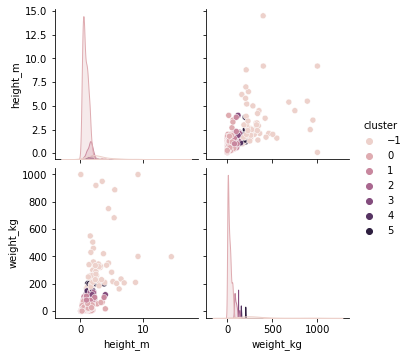

In [75]:
sns.pairplot(data=y,vars=['height_m','weight_kg'], hue='cluster')

In [76]:
x_std = df.loc[:,['height_m','weight_kg']]

In [77]:
imputer.fit(x_std)

SimpleImputer()

In [78]:
x_std = imputer.transform(x_std)

In [79]:
x_std

array([[7.00e-01, 6.90e+00],
       [1.00e+00, 1.30e+01],
       [2.00e+00, 1.00e+02],
       ...,
       [5.50e+00, 8.88e+02],
       [2.40e+00, 2.30e+02],
       [1.00e+00, 8.05e+01]])

In [80]:
def distance_to_other_clusters(single_pokemon):
    metric = np.array(single_pokemon[['weight_kg','height_m']])
    cluster_number = round(single_pokemon['cluster'])
    distance = 0
    for cluster_index in range(0, len(cls_centers)):
        if cluster_index == cluster_number:
            continue
        center = cls_centers[cluster_index]
        distance += sum(np.square(metric - center))
    return distance

# evaluate all pokemon
pokemon_dissimilarity = pokemon_std.apply(distance_to_other_clusters, axis=1)
pokemon_dissimilarity = pokemon_dissimilarity.rename('dissimilarity')

# join to other metrics
pokemon_processed = pokemon_std.join(pokemon_dissimilarity.to_frame()).join(df['name'].to_frame())

# pick most dissimilar pokemon per cluster
chosen_pokemon3 = pd.DataFrame()
for cluster_index in range(0, len(cluster_centers)):
    pokemon_cluster = pokemon_processed[pokemon_processed['cluster'] == cluster_index]
    chosen_pokemon3 = chosen_pokemon3.append(pokemon_cluster[pokemon_cluster['dissimilarity']==pokemon_cluster['dissimilarity'].max()])

In [81]:
chosen_pokemon3

,height_m,weight_kg,hp,attack,defense,speed,cluster,dissimilarity,name
25,-1.048727,-0.552063,-0.337101,0.222095,-0.747786,1.510514,0,3.029407e+08,Raichu
37,-1.048727,-0.552063,0.152062,-0.337627,0.064716,1.475921,0,3.029407e+08,Ninetales
50,-1.048727,-0.552063,-1.277799,0.688530,-0.422785,1.510514,0,3.029407e+08,Dugtrio
52,-1.048727,-0.552063,-0.148961,-0.555296,-0.422785,1.683478,0,3.029407e+08,Persian
719,-1.048727,-0.552063,0.415457,2.554270,-0.422785,0.472727,0,3.029407e+08,Hoopa
744,-1.048727,-0.552063,0.603597,1.154965,0.064716,0.541912,0,3.029407e+08,Lycanroc
26,-1.048727,-0.552063,-0.713380,-0.088861,0.552217,-0.910990,1,3.029407e+08,Sandshrew
27,-1.048727,-0.552063,0.227318,0.688530,1.527220,-0.046167,1,3.029407e+08,Sandslash
73,-1.048727,-0.552063,-1.089659,0.066617,0.877218,-1.602848,1,3.029407e+08,Geodude
74,-1.048727,-0.552063,-0.525241,0.533052,1.364719,-1.083954,1,3.029407e+08,Graveler
